In [1]:
from massexport import getratio, getanalytics

ratio = False
#models = ["m2m-100", "mbart", "nllb"]
#unify_occupations(models)

mbart = getanalytics("mbart") if not ratio else getratio("mbart")
nllb = getanalytics("nllb") if not ratio else getratio("nllb")
m2m = getanalytics("m2m-100") if not ratio else getratio("m2m-100")

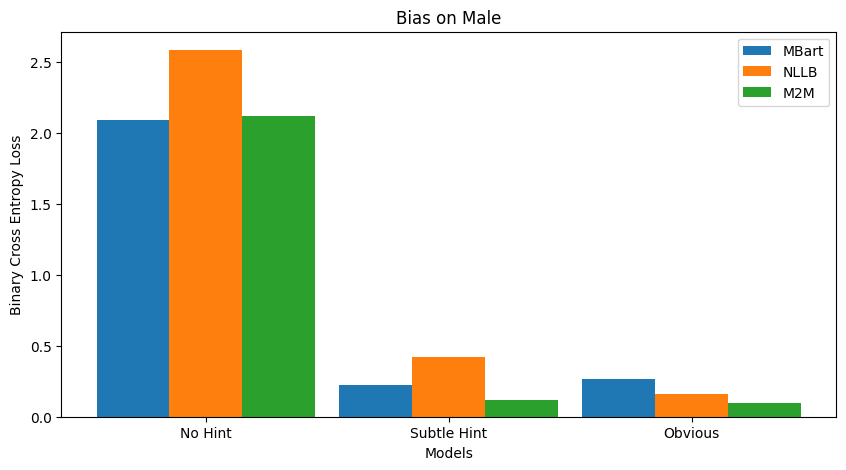

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def plot(gender):
    N = 3

    # Position of bars on x-axis
    ind = np.arange(N)

    # Figure size
    plt.figure(figsize=(10,5))

    # Width of a bar 
    width = 0.3       

    # Plotting
    plt.bar(ind, mbart[gender], width, label='MBart')
    plt.bar(ind + width, nllb[gender], width, label='NLLB')
    plt.bar(ind + 2 * width, m2m[gender], width, label='M2M')

    plt.xlabel('Models')
    plt.ylabel("Binary Cross Entropy Loss")
    plt.title(f'Bias on {gender}')

    # xticks()
    # First argument - A list of positions at which ticks should be placed
    # Second argument -  A list of labels to place at the given locations
    plt.xticks(ind + width, ('No Hint', 'Subtle Hint', 'Obvious'))

    # Finding the best position for legends and putting it
    plt.legend(loc='best')
    plt.show()

plot("Male")

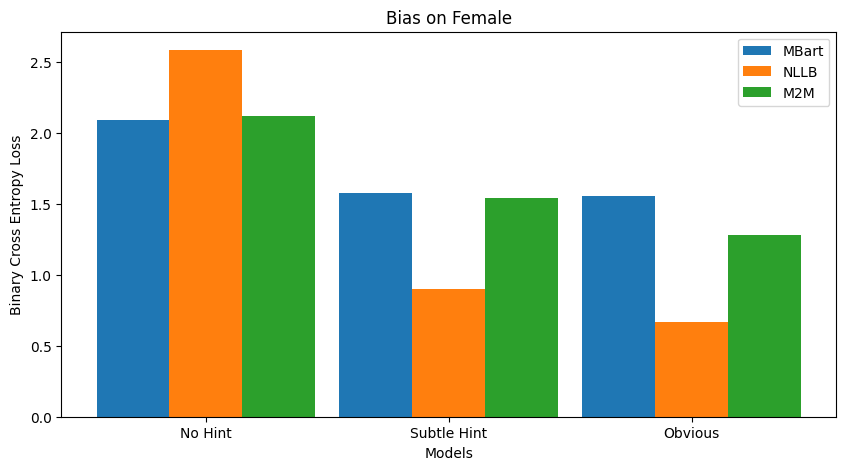

In [3]:
plot("Female")

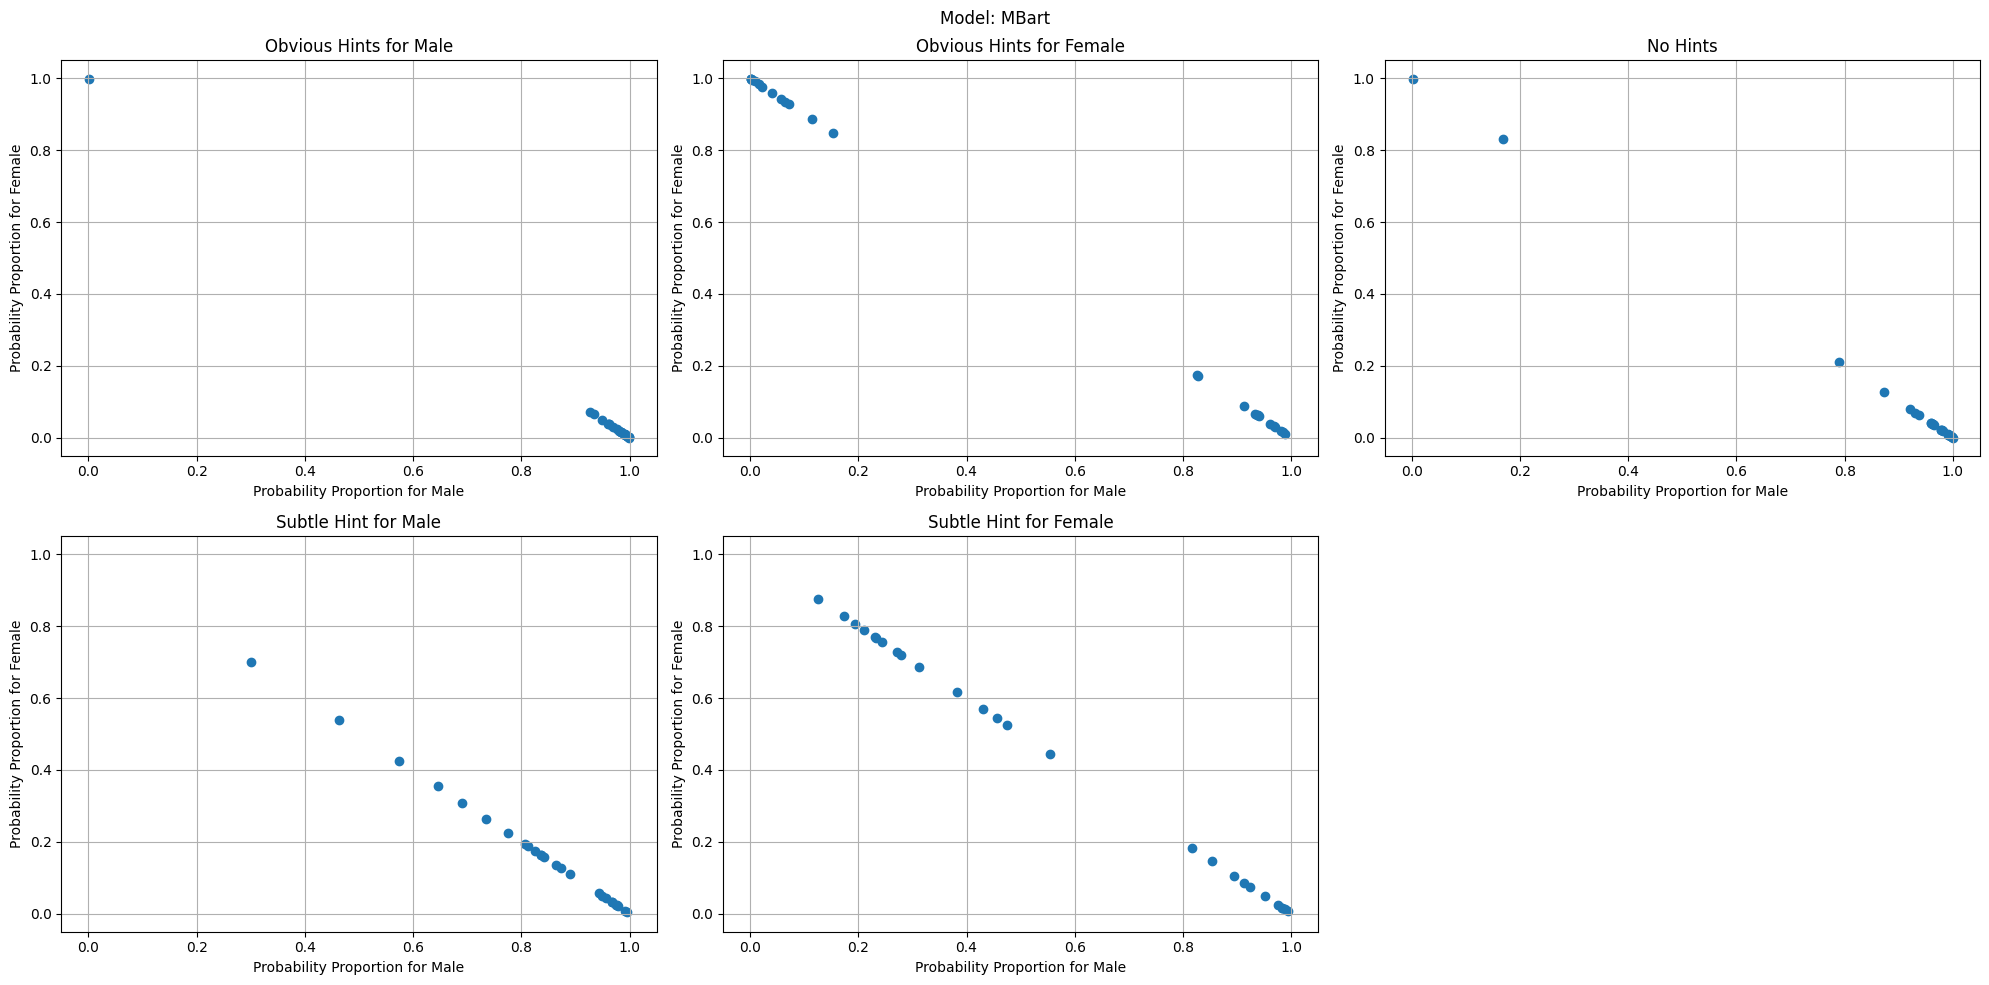

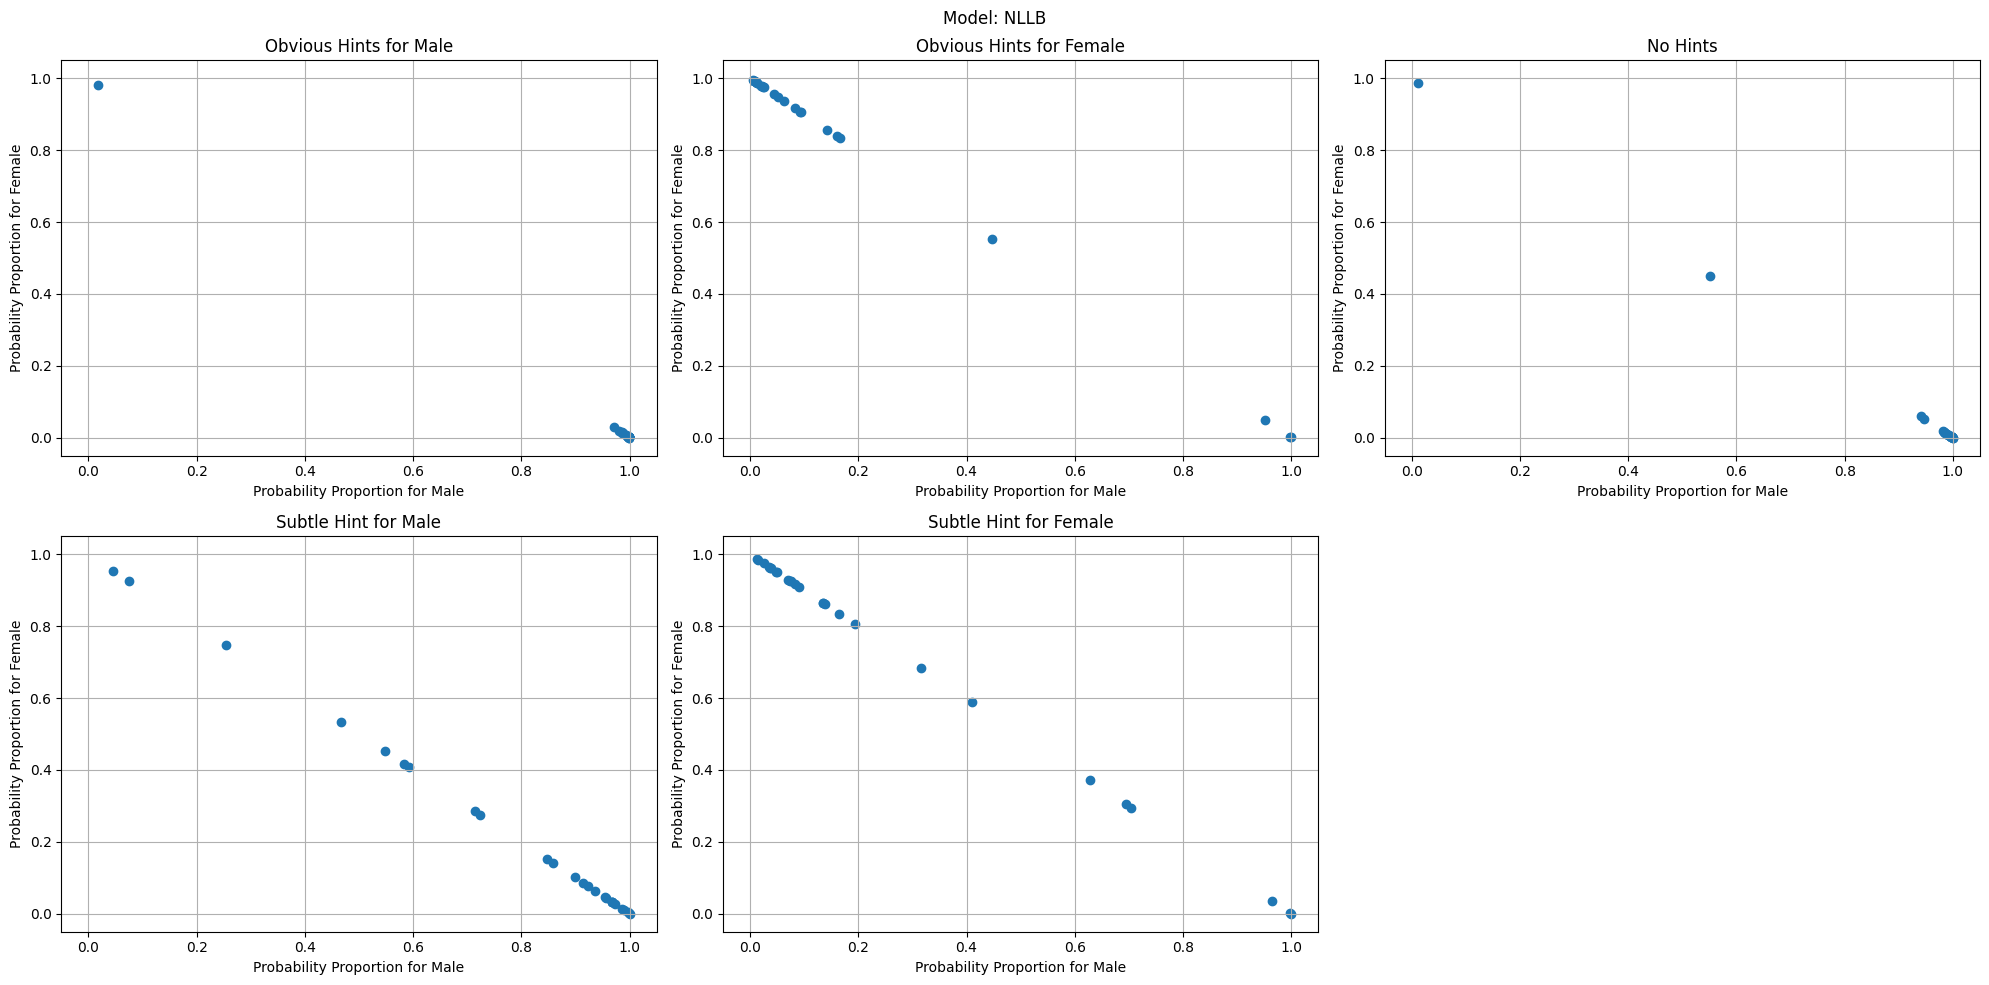

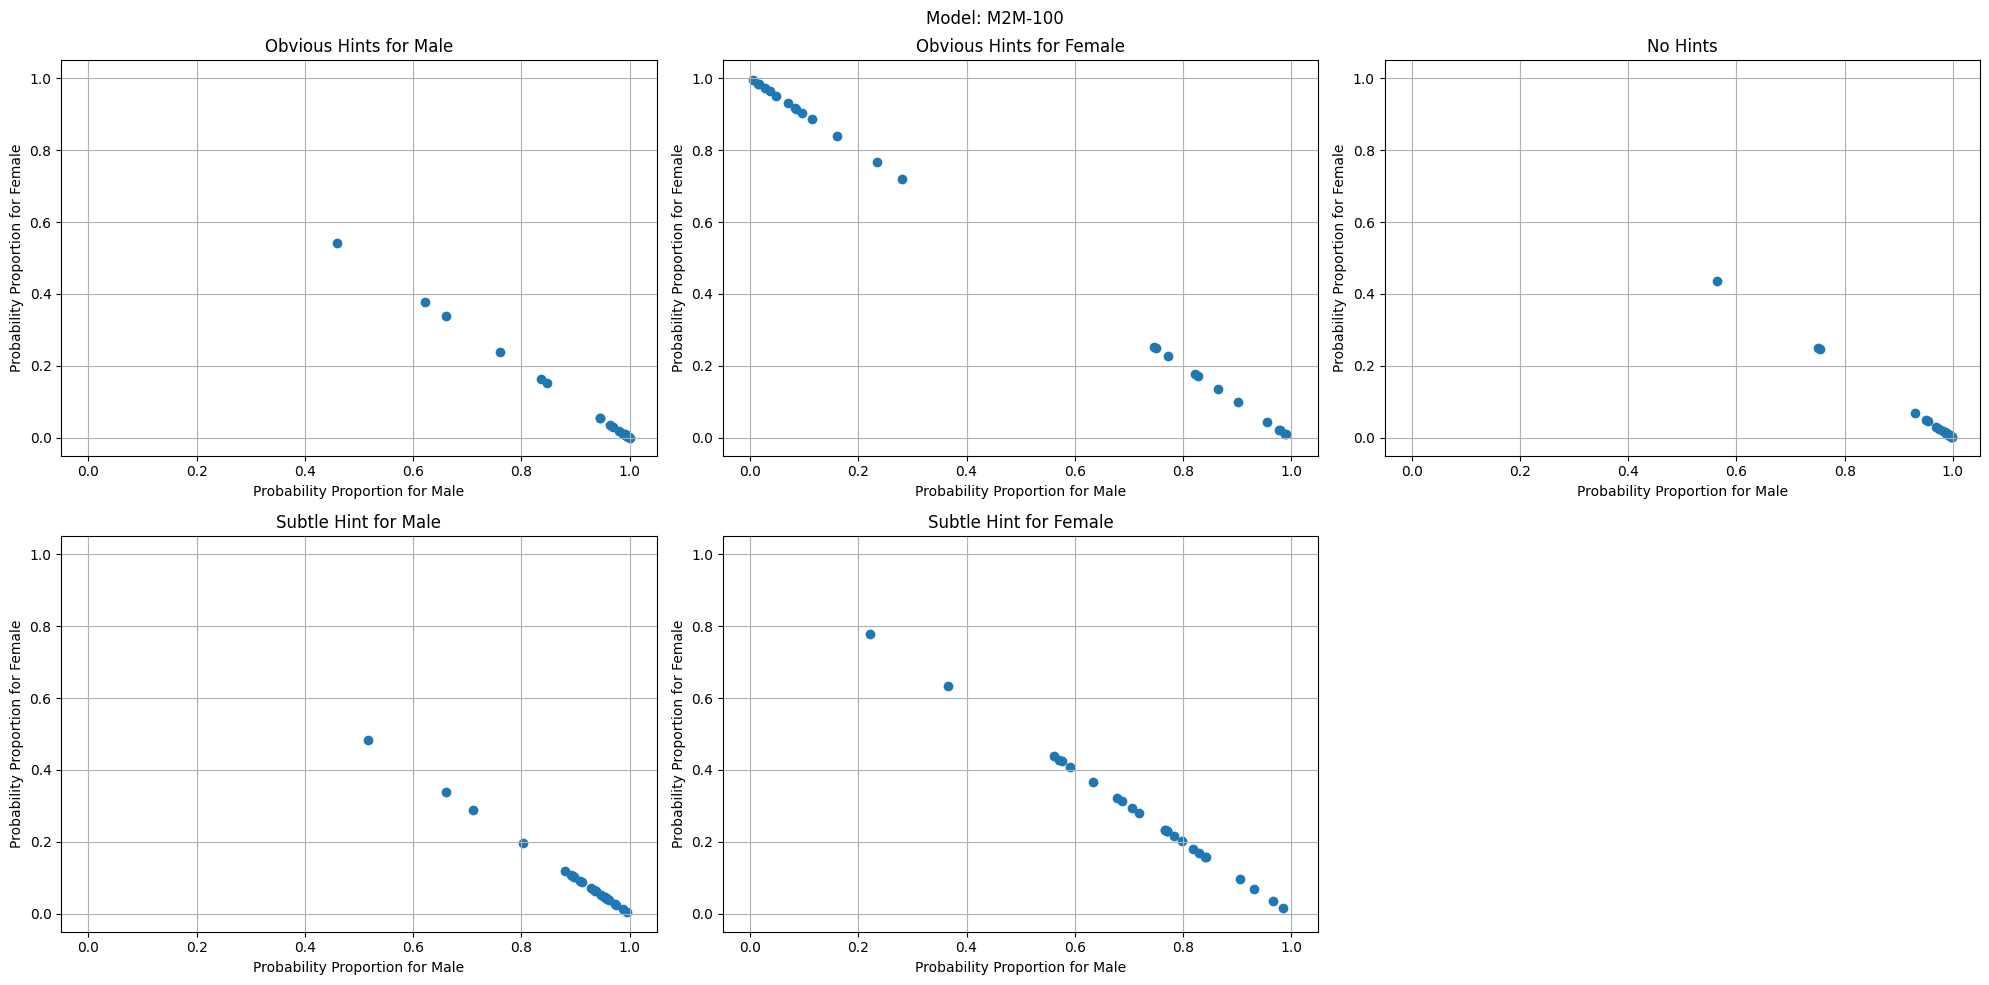

In [4]:
from pathlib import Path
import pandas as pd

def getvals(model, title = None):
    path = Path.cwd() / "probabilities" / model
    
    file = path / "Merged-Prob.xlsx"
    sheets = pd.ExcelFile(file).sheet_names
    dfs = pd.read_excel(file, sheet_name=sheets)
    fig, axs = plt.subplots(ncols = 3, nrows = 2, figsize = (20, 10))
    titles = {
        "obv (M)": "Obvious Hints for Male",
        "obv (F)": "Obvious Hints for Female",
        "nohints": "No Hints",
        "hints (M)": "Subtle Hint for Male",
        "hints (F)": "Subtle Hint for Female",
    }
    for sheetname, sheet in dfs.items():
        df = pd.DataFrame()
        df["Male"] = sheet[[i for i in sheet.columns if "Male" in i]].mean(axis = 1)
        df["Female"] = sheet[[i for i in sheet.columns if "Female" in i]].mean(axis = 1)
        pos = list(titles.keys()).index(sheetname)
        axs[pos // 3, pos % 3].scatter(df["Male"], df["Female"])
        axs[pos // 3, pos % 3].set_title(titles[sheetname])
        axs[pos // 3, pos % 3].set_xlabel("Probability Proportion for Male")
        axs[pos // 3, pos % 3].set_ylabel("Probability Proportion for Female")
        axs[pos // 3, pos % 3].set_xlim((-0.05, 1.05))
        axs[pos // 3, pos % 3].set_ylim((-0.05, 1.05))
        axs[pos // 3, pos % 3].grid()
    
    axs[1, 2].remove()
    plt.suptitle(f"Model: {title if title is not None else model.upper()}")
    plt.tight_layout()
    plt.show()

getvals("mbart", title = "MBart")
getvals("nllb", title = "NLLB")
getvals("m2m-100", title = "M2M-100")
   
